# readme
descrip: plot projected SSH change (future minus historic) near US coastlines for Sunway LR, HR (transient TR minus control CN)

update history: <br>
v1.0 DL 2021Apr12 <br>
v1.1 DL 2021May01 make publication-ready pics <br>
v1.2 DL 2021May05 make publication-ready pics <br>
v1.3 DL 2021May17 combine global coasts and US, Asia and tropical islands into one pic because nature-climate change has 6 diaplay items (limits) for main text <br>
v1.4 DL 2021Jun01 pivot from nature(climate change) to CESM-HR special volume, always use transient minus control to accout for model drift
v1.5 DL 2021Jun30 make two pics: 1 for US northeast coast and 1 for us southeast coast

extra notes: <br>
Fig 1 for CESM-HR special volume: $\Delta SSH$ = SSH(2081-2100) - SSH (2001-2020) for LR and HR in North Atlantic <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from cartopy.mpl.geoaxes import GeoAxes
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

# from eofs.xarray import Eof

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

In [2]:
client = Client("tcp://10.73.3.235:46650")
client

Client Scheduler: tcp://10.73.3.235:46650 Dashboard: http://10.73.3.235:8787/status,Cluster Workers: 10 Cores: 10 Memory: 210.00 GB


# define parameters and load data

In [64]:
# === North Atlantic ===
# lat, lon ranges and nlat, nlon ranges for t12 and g16 grids, 
# nlat and nlon ranges are slightly larger than lat and lon ranges. 
lon1_NA, lon2_NA = -100, -40
lat1_NA, lat2_NA = 10, 60

nlon1_NA_t12, nlon2_NA_t12 = 50, 800
nlat1_NA_t12, nlat2_NA_t12 = 1200, 2100

nlon1_NA_g16, nlon2_NA_g16 = 260, 321
nlat1_NA_g16, nlat2_NA_g16 = 200, 370
# =======================

# === Gulf of Maine (GMa) ===
lat1_GMa, lat2_GMa = 25, 55
lon1_GMa, lon2_GMa = -85, -50 # GMa: Gulf of Maine

lon1b_GMa, lon2b_GMa = -71+360, -66+360  # b: box, highlight region with a box 
lat1b_GMa, lat2b_GMa = 42, 45
# ===========================

# === Gulf of Maxico (GMe) ===
lat1_GMe, lat2_GMe = 15, 35
lon1_GMe, lon2_GMe = -100, -75 # GMe: Gulf of Mexico

lon1b_GMe, lon2b_GMe = -95+360, -85+360 # b: box, highlight region with a box 
lat1b_GMe, lat2b_GMe = 23, 28
# ============================

chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'

pic1 = outdir+'SSHMassRedistStericHeightFutureMinusHistGulfMaine_2021Jun29.png' # main text fig
pic2 = outdir+'SSHMassRedistStericHeightFutureMinusHistGulfMexico_2021Jun29.png' # main text fig

In [4]:
infile1_TH = ('/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
              'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_TH = xr.open_dataset(infile1_TH, chunks=chunks_HR)
ds_TH

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 3012)
Coordinates:
  * time        (time) object 1850-02-01 00:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 400, 300), meta=np.ndarray>
Attributes:
    title:           B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2019-10-29 at 17:54:15.4
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    19331
    tavg_sum:        2676600.0
    tavg_sum_qflux:  2676600.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [5]:
infile1_CH = ('/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SSH.0021.0501.nc')
ds_CH_raw = xr.open_dataset(infile1_CH, chunks=chunks_HR)
print(ds_CH_raw.time)
# 250-->1850, 500-->2100
# 21-->1621,  501-->2101, 1850-(250-21)=1621
time_CH = xr.cftime_range(start="1621", end="2102", freq='Y') 
# 2102 is not included, 2101 is the last year
ds_CH = ds_CH_raw.assign_coords(time=time_CH)
ds_CH

<xarray.DataArray 'time' (time: 481)>
array([cftime.DatetimeNoLeap(21, 7, 16, 22, 0, 0, 0),
       cftime.DatetimeNoLeap(22, 7, 16, 22, 0, 0, 0),
       cftime.DatetimeNoLeap(23, 7, 16, 22, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(499, 7, 2, 5, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 7, 2, 5, 0, 0, 0),
       cftime.DatetimeNoLeap(501, 7, 2, 5, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0021-07-16 22:00:00 ... 0501-07-02 05:00:00
Attributes:
    long_name:     time
    bounds:        time_bound
    cell_methods:  time: mean


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 481)
Coordinates:
  * time        (time) object 1621-12-31 00:00:00 ... 2101-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(481, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(481, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2019-05-27 at 10:36:42.5
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  19331
    tavg_sum:      2676600.0
    history:       Thu May 21 22:18:12 2020: ncra -F -d time,1,12 B.E.13.B185...
    NCO:           netCDF Operators version 4.7.9 (Homepage = http://nco.sf.n...

In [6]:
infile1_TL = ('/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
              'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.185001.210012.nc')
ds_TL = xr.open_dataset(infile1_TL,chunks=chunks_LR)
ds_TL

<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 3012)
Coordinates:
  * time        (time) object 1850-01-17 12:00:00 ... 2100-12-17 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(3012, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(3012, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:         Thu May 14 01:43:04 2020: ncra -O -v SSH /home/export/on...
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    ...              ...
    start_time:      This dataset was created on 2020-04-11 at 22:12:21.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    25
    tavg_sum:        86400.0
    tavg_sum_qflux:  86400.0
    NCO:             netCDF Operators version 4.9.1 (Homepage = http://nco.sf...

In [7]:
infile1_CL = ('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
              'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.SSH.000101.050012.nc')
ds_CL_raw = xr.open_dataset(infile1_CL,chunks=chunks_LR)
print(ds_CL_raw.time)
# 250-->1850, 500-->2100
# 1-->1621, # 1850-(250-1)=1601
time_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M')
# 2101-01 is not included, the last time is 2100-12
ds_CL = ds_CL_raw.assign_coords(time=time_CL)
ds_CL

<xarray.DataArray 'time' (time: 6000)>
array([cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(500, 10, 17, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 11, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 17, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0500-12-17 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 384, nlon: 320, time: 6000)
Coordinates:
  * time        (time) object 1601-01-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(6000, 384, 320), meta=np.ndarray>
Attributes:
    title:           B.E.13.B1850C5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-12 at 12:53:17.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [8]:
infile_h_rst_TH = ('/scratch/user/dapengli/Projects4iHESP/'
'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
'RegionalStericHeight/test_2021Apr20/'
'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
# infiles_TH
ds_h_rst_TH = xr.open_dataset(infile_h_rst_TH, chunks=chunks_HR)
ds_h_rst_TH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(251, 400, 300), meta=np.ndarray>

In [9]:
infile_h_rst_CH = ('/scratch/user/dapengli/Projects4iHESP/'
'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
'RegionalStericHeight/test_2021Apr20/'
'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_RegionalStericHeight250-500_2021May21.nc')
# infiles_TH
ds_h_rst_CH_raw = xr.open_dataset(infile_h_rst_CH, chunks=chunks_HR)
print(ds_h_rst_CH_raw.time)
time_h_rst_CH=ds_h_rst_CH_raw.time.to_pandas().index.shift(1850-250,'Y') # 1850 --> 250
ds_h_rst_CH = ds_h_rst_CH_raw.assign_coords(time=time_h_rst_CH)
ds_h_rst_CH

<xarray.DataArray 'time' (time: 251)>
array([cftime.DatetimeNoLeap(250, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(251, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(252, 12, 31, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(498, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(499, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00


<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(251, 400, 300), meta=np.ndarray>

In [10]:
infile_h_rst_TL = ('/scratch/user/dapengli/Projects4iHESP/'
'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
'RegionalStericHeight/test_2021Apr20/'
'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
ds_h_rst_TL = xr.open_dataset(infile_h_rst_TL, chunks=chunks_LR)
ds_h_rst_TL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 250)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(250, 384, 320), meta=np.ndarray>

In [11]:
infile_h_rst_CL = ('/scratch/user/dapengli/Projects4iHESP/'
'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
'RegionalStericHeight/test_2021Apr20/'
'B.E.13.B1850C5.ne30g16.sehires38.003.sunway_RegionalStericHeight250-500_2021May21.nc')
ds_h_rst_CL_raw = xr.open_dataset(infile_h_rst_CL, chunks=chunks_LR)
print(ds_h_rst_CL_raw.time)
time_h_rst_CL=ds_h_rst_CL_raw.time.to_pandas().index.shift(1850-250,'Y') # 1850 --> 250
ds_h_rst_CL = ds_h_rst_CL_raw.assign_coords(time=time_h_rst_CL)
ds_h_rst_CL

<xarray.DataArray 'time' (time: 246)>
array([cftime.DatetimeNoLeap(250, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(251, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(252, 12, 31, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(498, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(499, 12, 31, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(500, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0250-12-31 00:00:00 ... 0500-12-31 00:00:00


<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 246)
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2100-12-31 00:00:00
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(246, 384, 320), meta=np.ndarray>

In [12]:
infile0_LR = ('/ihesp/archive/B.E.13.BHISTC5.ne30g16.sehires38.003.sunway/ocn/monthly/'
              'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_LR = xr.open_dataset(infile0_LR)
ds0_LR

infile0_HR = ('/ihesp/archive/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02/ocn/'
              'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0250-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_HR

infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds_t12 = xr.open_dataset(infile_t12)
ds_t12

infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/'
'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds_g16 = xr.open_dataset(infile_g16)
ds_g16

ds_NA_t12 = ds_t12.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12),
                        nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
ds_NA_g16 = ds_g16.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16),
                        nlat=slice(nlat1_NA_g16, nlat2_NA_g16))

# data analysis

In [13]:
h_rst1_TH = ds_h_rst_TH.h_rst.sel(time=slice('2001','2020')).mean('time')
h_rst1_gl_av_TH = h_rst1_TH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
h_rsta1_TH = h_rst1_TH - h_rst1_gl_av_TH

h_rst1_CH = ds_h_rst_CH.h_rst.sel(time=slice('2001','2020')).mean('time')
h_rst1_gl_av_CH = h_rst1_CH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
h_rsta1_CH = h_rst1_CH - h_rst1_gl_av_CH

h_rst2_TH = ds_h_rst_TH.h_rst.sel(time=slice('2081','2100')).mean('time')
h_rst2_gl_av_TH = h_rst2_TH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
h_rsta2_TH = h_rst2_TH - h_rst2_gl_av_TH

h_rst2_CH = ds_h_rst_CH.h_rst.sel(time=slice('2081','2100')).mean('time')
h_rst2_gl_av_CH = h_rst2_CH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat"))
h_rsta2_CH = h_rst2_CH - h_rst2_gl_av_CH

dh_rst_THmCH = (h_rsta2_TH-h_rsta1_TH) - (h_rsta2_CH-h_rsta1_CH)

# force to compute for xesmf, drop ULONG and ULAT since the weight files do not have these coordinates
dh_rst_THmCH = dh_rst_THmCH.compute()
dh_rst_NA_THmCH = dh_rst_THmCH.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12),
                                    nlat=slice(nlat1_NA_t12, nlat2_NA_t12))
dh_rst_THmCH

<xarray.DataArray 'h_rst' (nlat: 2400, nlon: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: nlat, nlon

In [14]:
h_rst1_TL = ds_h_rst_TL.h_rst.sel(time=slice('2001','2020')).mean('time')
h_rst1_gl_av_TL = h_rst1_TL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat"))
h_rsta1_TL = h_rst1_TL - h_rst1_gl_av_TL

h_rst1_CL = ds_h_rst_CL.h_rst.sel(time=slice('2001','2020')).mean('time')
h_rst1_gl_av_CL = h_rst1_CL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat"))
h_rsta1_CL = h_rst1_CL - h_rst1_gl_av_CL

h_rst2_TL = ds_h_rst_TL.h_rst.sel(time=slice('2081','2100')).mean('time')
h_rst2_gl_av_TL = h_rst2_TL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat"))
h_rsta2_TL = h_rst2_TL - h_rst2_gl_av_TL

h_rst2_CL = ds_h_rst_CL.h_rst.sel(time=slice('2081','2100')).mean('time')
h_rst2_gl_av_CL = h_rst2_CL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat"))
h_rsta2_CL = h_rst2_CL - h_rst2_gl_av_CL

dh_rst_TLmCL = ((h_rsta2_TL-h_rsta1_TL) - (h_rsta2_CL-h_rsta1_CL)).compute()

# force to compute for xesmf, drop ULONG and ULAT since the weight files do not have these coordinates
# dh_rst_TLmCL = dh_rst_TLmCL.drop(['ULONG','ULAT']).compute()
dh_rst_NA_TLmCL = dh_rst_TLmCL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16),
                                    nlat=slice(nlat1_NA_g16, nlat2_NA_g16))
dh_rst_TLmCL

<xarray.DataArray 'h_rst' (nlat: 384, nlon: 320)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [-11.64984899, -11.66466334, -11.66477049, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
Dimensions without coordinates: nlat, nlon

In [15]:
ssh1_TH = ds_TH.SSH.sel(time=slice('2001','2020'))
ssh2_TH = ds_TH.SSH.sel(time=slice('2081','2100'))
dssh_TH = (ssh2_TH.mean('time') - ssh1_TH.mean('time')).compute()

ssh1_CH = ds_CH.SSH.sel(time=slice('2001','2020'))
ssh2_CH = ds_CH.SSH.sel(time=slice('2081','2100'))
dssh_CH = (ssh2_CH.mean('time') - ssh1_CH.mean('time')).compute()

dssh_THmCH = dssh_TH - dssh_CH
dssh_NA_THmCH = dssh_THmCH.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), 
                                   nlat=slice(nlat1_NA_t12, nlat2_NA_t12))

dh_m_THmCH = dssh_THmCH - dh_rst_THmCH
dh_m_NA_THmCH = dh_m_THmCH.isel(nlon=slice(nlon1_NA_t12, nlon2_NA_t12), 
                                   nlat=slice(nlat1_NA_t12, nlat2_NA_t12))

NameError: name 'dssh_NA_THmCH' is not defined

In [17]:
ssh1_TL = ds_TL.SSH.sel(time=slice('2001','2020'))
ssh2_TL = ds_TL.SSH.sel(time=slice('2081','2100'))
dssh_TL = ssh2_TL.mean('time') - ssh1_TL.mean('time')
# dssh_NA_TL = dssh_TL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute()

ssh1_CL = ds_CL.SSH.sel(time=slice('2001','2020'))
ssh2_CL = ds_CL.SSH.sel(time=slice('2081','2100'))
dssh_CL = ssh2_CL.mean('time') - ssh1_CL.mean('time')
# dssh_NA_CL = dssh_CL.isel(nlon=slice(nlon1_g16, nlon2_g16), nlat=slice(nlat1_g16, nlat2_g16)).compute()


dssh_TLmCL = (dssh_TL - dssh_CL).compute()
dssh_NA_TLmCL = dssh_TLmCL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), 
                                nlat=slice(nlat1_NA_g16, nlat2_NA_g16))

dh_m_TLmCL = dssh_TLmCL - dh_rst_TLmCL
dh_m_NA_TLmCL = dh_m_TLmCL.isel(nlon=slice(nlon1_NA_g16, nlon2_NA_g16), 
                                nlat=slice(nlat1_NA_g16, nlat2_NA_g16))

In [19]:
print('HR global mean SSH change:', 
      dssh_THmCH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat")).values)
print('LR global mean SSH change:', 
      dssh_TLmCL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat")).values)


print('HR global mean steric height change:', 
      dh_rst_THmCH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat")).values)
print('LR global mean steric height change:', 
      dh_rst_TLmCL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat")).values)


print('HR global mean mass transport change:', 
      dh_m_THmCH.weighted(ds0_HR.TAREA).mean(("nlon", "nlat")).values)
print('LR global mean mass transport change:', 
      dh_m_TLmCL.weighted(ds0_LR.TAREA).mean(("nlon", "nlat")).values)

HR global mean SSH change: 0.0012542359717738203
LR global mean SSH change: 1.3783066800488688e-06
HR global mean steric height change: -6.493807484021684e-13
LR global mean steric height change: 1.3323047752102826e-12
HR global mean mass transport change: 0.0012542359724197082
LR global mean mass transport change: 1.3783053459630678e-06


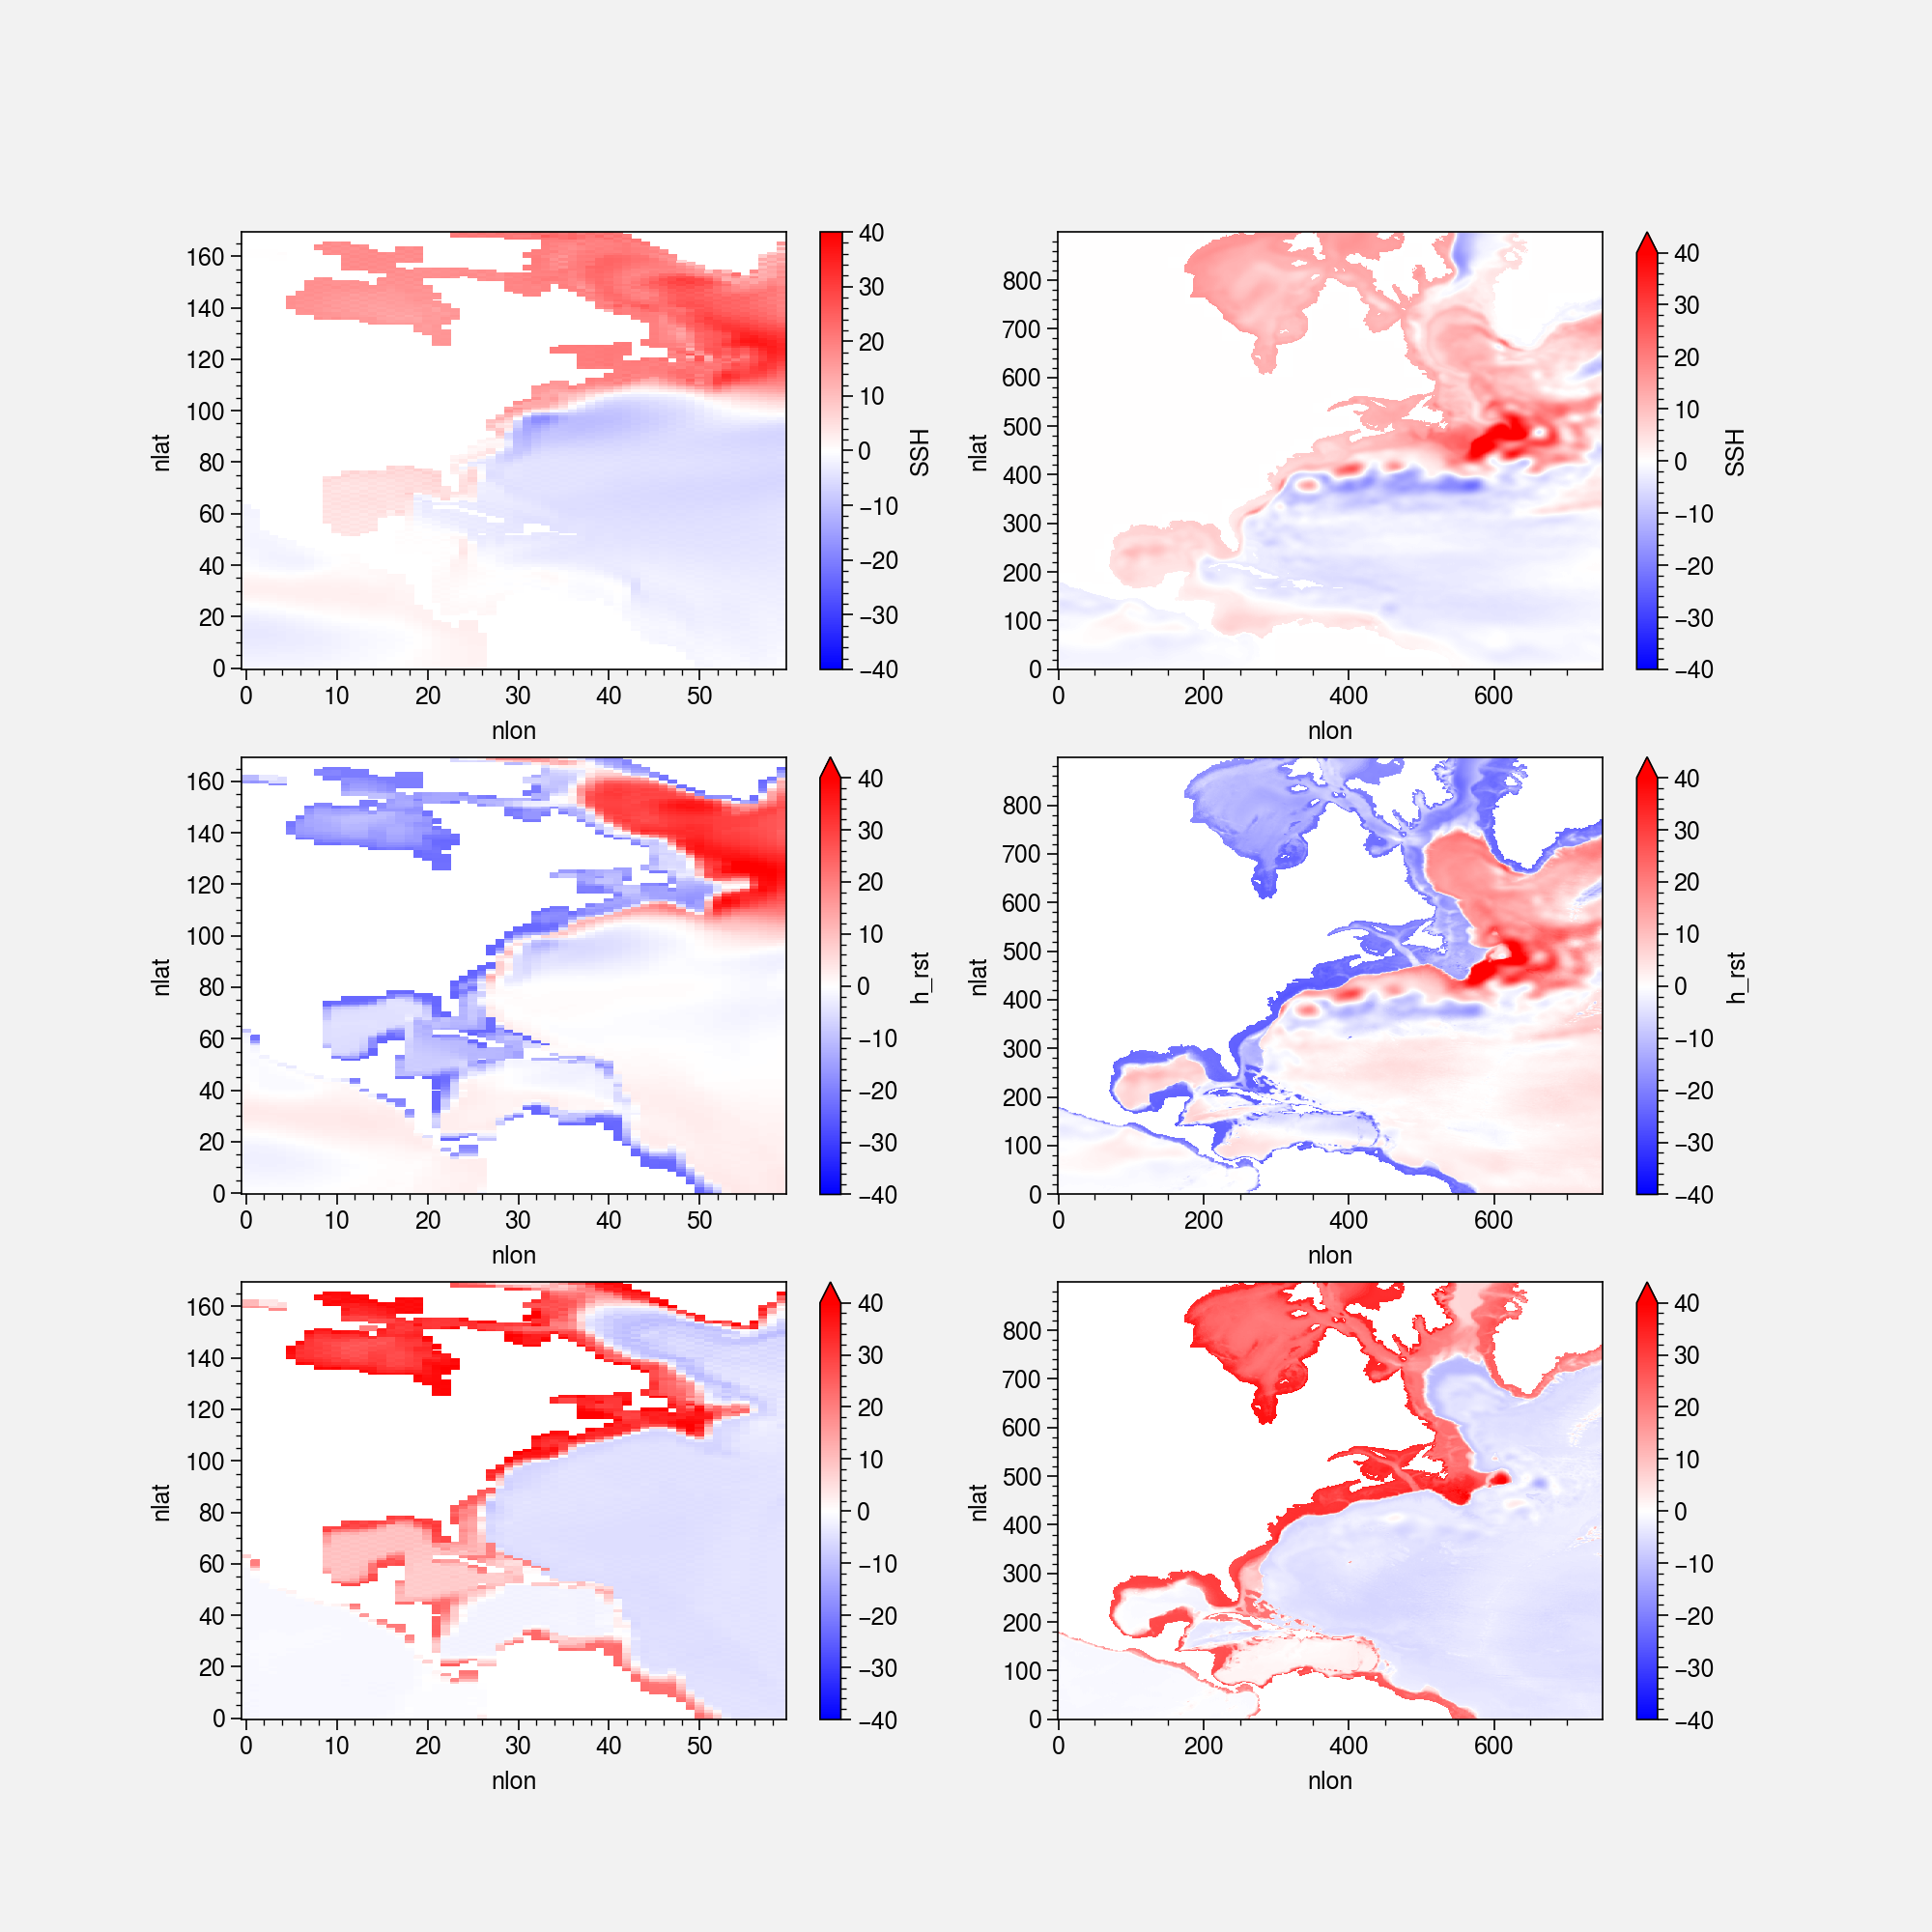

In [21]:
fig, axs = plt.subplots(3,2,figsize=(10,10))
dssh_NA_TLmCL.plot(ax=axs[0,0],vmin=-40,vmax=40,cmap='bwr')
dh_rst_NA_TLmCL.plot(ax=axs[1,0],vmin=-40,vmax=40,cmap='bwr')
dh_m_NA_TLmCL.plot(ax=axs[2,0],vmin=-40,vmax=40,cmap='bwr')

dssh_NA_THmCH.plot(ax=axs[0,1],vmin=-40,vmax=40,cmap='bwr')
dh_rst_NA_THmCH.plot(ax=axs[1,1],vmin=-40,vmax=40,cmap='bwr')
dh_m_NA_THmCH.plot(ax=axs[2,1],vmin=-40,vmax=40,cmap='bwr')

# make pics

Gulf of Maine (northeast coast)

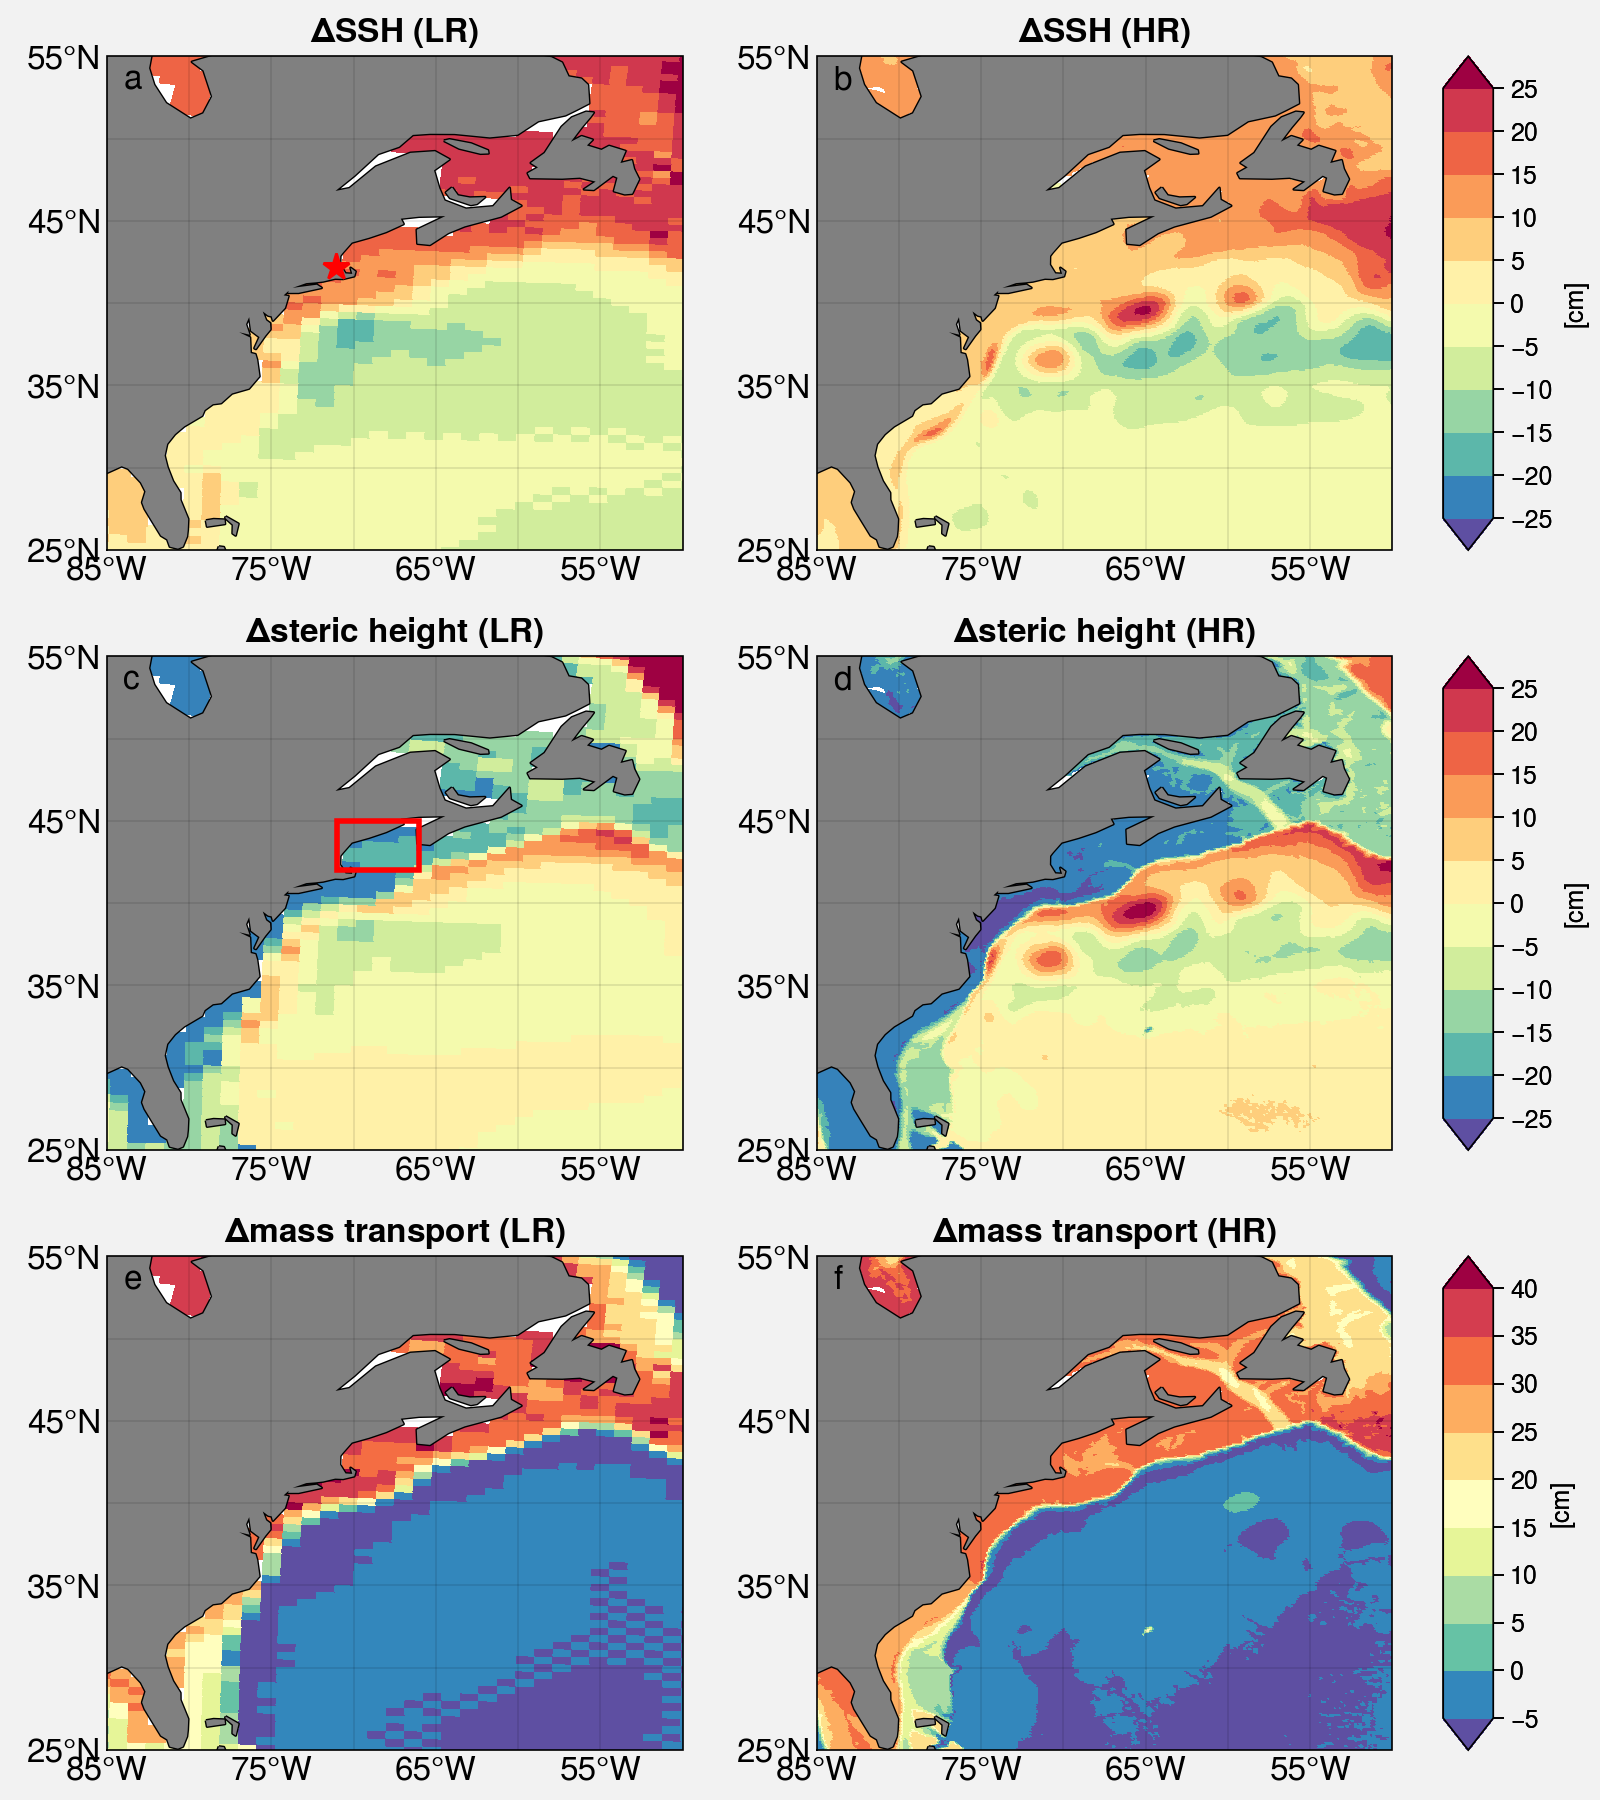

In [65]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='9in')

m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dssh_NA_TLmCL,levels=np.arange(-25,25+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 10), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title(r'$\Delta$SSH (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-84, 53, 'a', transform=pc, fontsize=12)


m01=axs[0,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dssh_NA_THmCH,levels=np.arange(-25,25+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 10), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title(r'$\Delta$SSH (HR)', fontsize=12, fontweight='bold')
axs[0,1].text(-84, 53, 'b', transform=pc, fontsize=12)
# add colorbar
cb = axs[0,1].colorbar(m01,loc='r', label='[cm]',width='2em')

m10=axs[1,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dh_rst_NA_TLmCL,levels=np.arange(-25,25+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,10), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,10), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 10), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 10), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[1,0].set_title(r'$\Delta$steric height (LR)', fontsize=12, fontweight='bold')
axs[1,0].text(-84, 53, 'c', transform=pc, fontsize=12)
ap=axs[1,0].add_patch(mpatches.Rectangle(xy=[lon1b_GMa, lat1b_GMa], 
                                         width=(lon2b_GMa-lon1b_GMa), height=(lat2b_GMa-lat1b_GMa),
                                         facecolor='none',transform=pc,
                                         linewidth=2, edgecolor='r'))
ap.set_zorder(2)


m11=axs[1,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dh_rst_NA_THmCH, levels=np.arange(-25,25+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,10), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,10), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 10), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 10), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title(r'$\Delta$steric height (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-84, 53, 'd', transform=pc, fontsize=12)
# add colorbar
cb = axs[1,1].colorbar(m11,loc='r', label='[cm]',width='2em')

m20=axs[2,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dh_m_NA_TLmCL,levels=np.arange(-5,40+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,10), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,10), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 10), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 10), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[2,0].set_title(r'$\Delta$mass transport (LR)', fontsize=12, fontweight='bold')
axs[2,0].text(-84, 53, 'e', transform=pc, fontsize=12)


m21=axs[2,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dh_m_NA_THmCH,levels=np.arange(-5,40+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_GMa, lon2_GMa, lat1_GMa, lat2_GMa], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_GMa,lon2_GMa+1,10), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_GMa,lon2_GMa+1,10), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_GMa,lat2_GMa+1, 10), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_GMa,lat2_GMa+1, 10), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title(r'$\Delta$mass transport (HR)', fontsize=12, fontweight='bold')
axs[2,1].text(-84, 53, 'f', transform=pc, fontsize=12)
# add colorbar
cb = axs[2,1].colorbar(m21,loc='r', label='[cm]',width='2em')

fig1.savefig(pic1,bbox_inches='tight')

Gulf of Mexico (southeast coast)

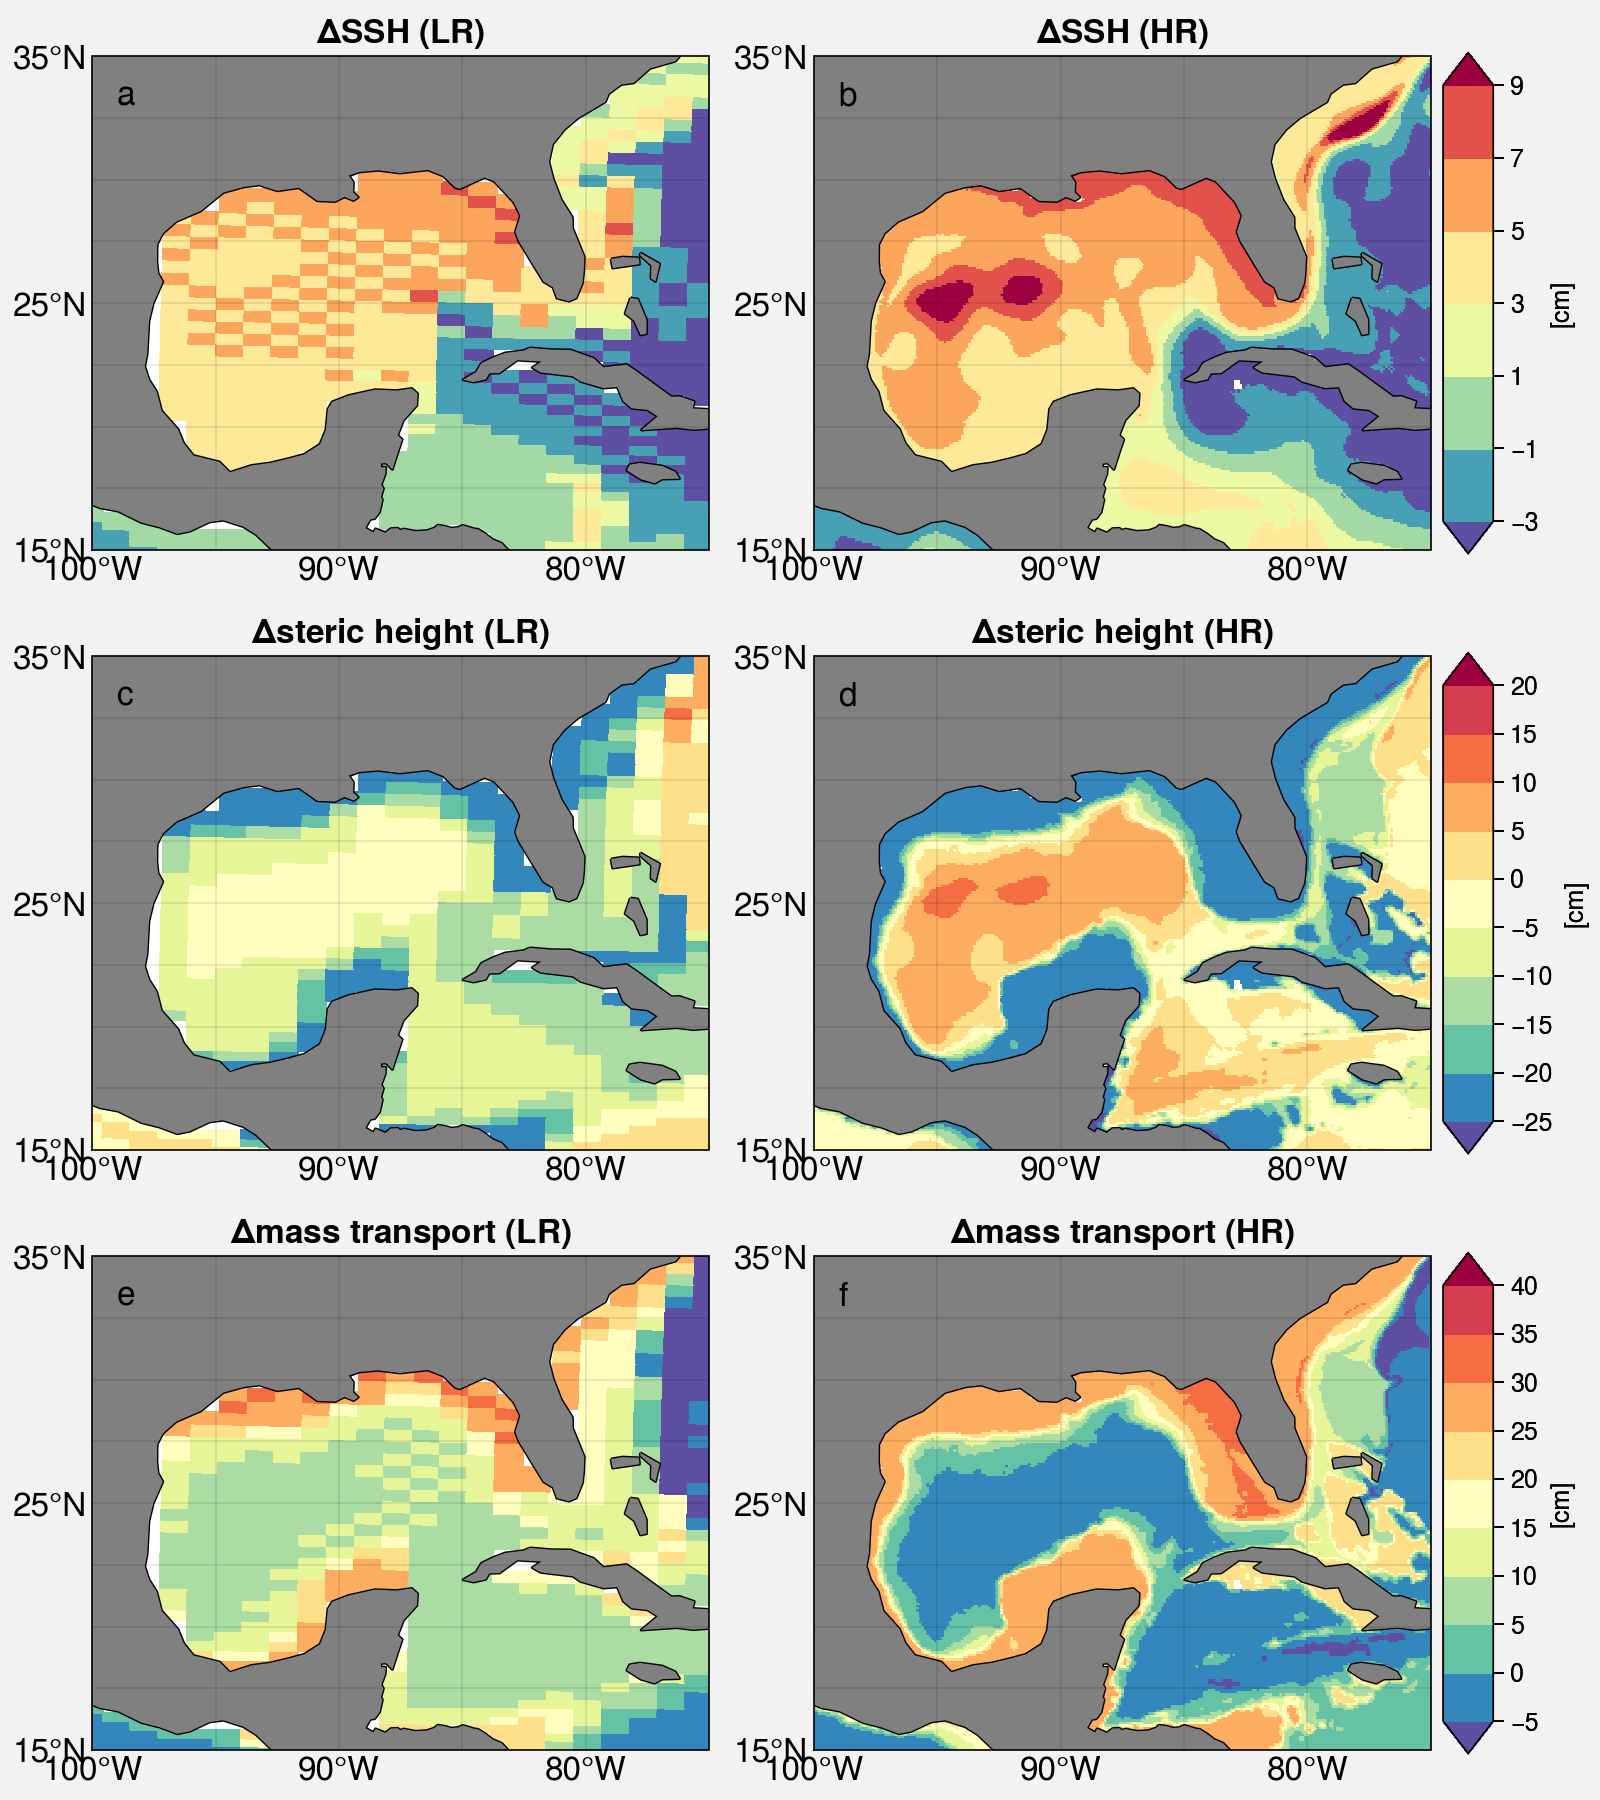

In [66]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig2, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='9in')

m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dssh_NA_TLmCL,levels=np.arange(-3,9+1,2), 
        transform=pc, cmap="spectral_r", extend='both')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 10), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[0,0].set_title(r'$\Delta$SSH (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-99, 33, 'a', transform=pc, fontsize=12)


m01=axs[0,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dssh_NA_THmCH,levels=np.arange(-3,9+1,2), 
        transform=pc, cmap="spectral_r", extend='both')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 10), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title(r'$\Delta$SSH (HR)', fontsize=12, fontweight='bold')
axs[0,1].text(-99, 33, 'b', transform=pc, fontsize=12)
# add colorbar
cb = axs[0,1].colorbar(m01,loc='r', label='[cm]',width='2em')

m10=axs[1,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dh_rst_NA_TLmCL,levels=np.arange(-25,20+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,10), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,10), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 10), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 10), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[1,0].set_title(r'$\Delta$steric height (LR)', fontsize=12, fontweight='bold')
axs[1,0].text(-99, 33, 'c', transform=pc, fontsize=12)
# ap=axs[1,0].add_patch(mpatches.Rectangle(xy=[lon1b_GMe, lat1b_GMe], 
#                                          width=(lon2b_GMe-lon1b_GMe), height=(lat2b_GMe-lat1b_GMe),
#                                          facecolor='none',transform=pc,
#                                          linewidth=2, edgecolor='r'))
# ap.set_zorder(2)


m11=axs[1,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dh_rst_NA_THmCH, levels=np.arange(-25,20+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,10), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,10), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 10), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 10), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title(r'$\Delta$steric height (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-99, 33, 'd', transform=pc, fontsize=12)
# add colorbar
cb = axs[1,1].colorbar(m11,loc='r', label='[cm]',width='2em')

m20=axs[2,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dh_m_NA_TLmCL,levels=np.arange(-5,40+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
# axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,10), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,10), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 10), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 10), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[2,0].set_title(r'$\Delta$mass transport (LR)', fontsize=12, fontweight='bold')
axs[2,0].text(-99, 33, 'e', transform=pc, fontsize=12)


m21=axs[2,1].pcolormesh(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dh_m_NA_THmCH,levels=np.arange(-5,40+1,5), 
        transform=pc, cmap="spectral_r", extend='both')
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,10), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,10), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 10), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 10), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title(r'$\Delta$mass transport (HR)', fontsize=12, fontweight='bold')
axs[2,1].text(-99, 33, 'f', transform=pc, fontsize=12)
# add colorbar
cb = axs[2,1].colorbar(m21,loc='r', label='[cm]',width='2em')

fig2.savefig(pic2,bbox_inches='tight')

# Appendix

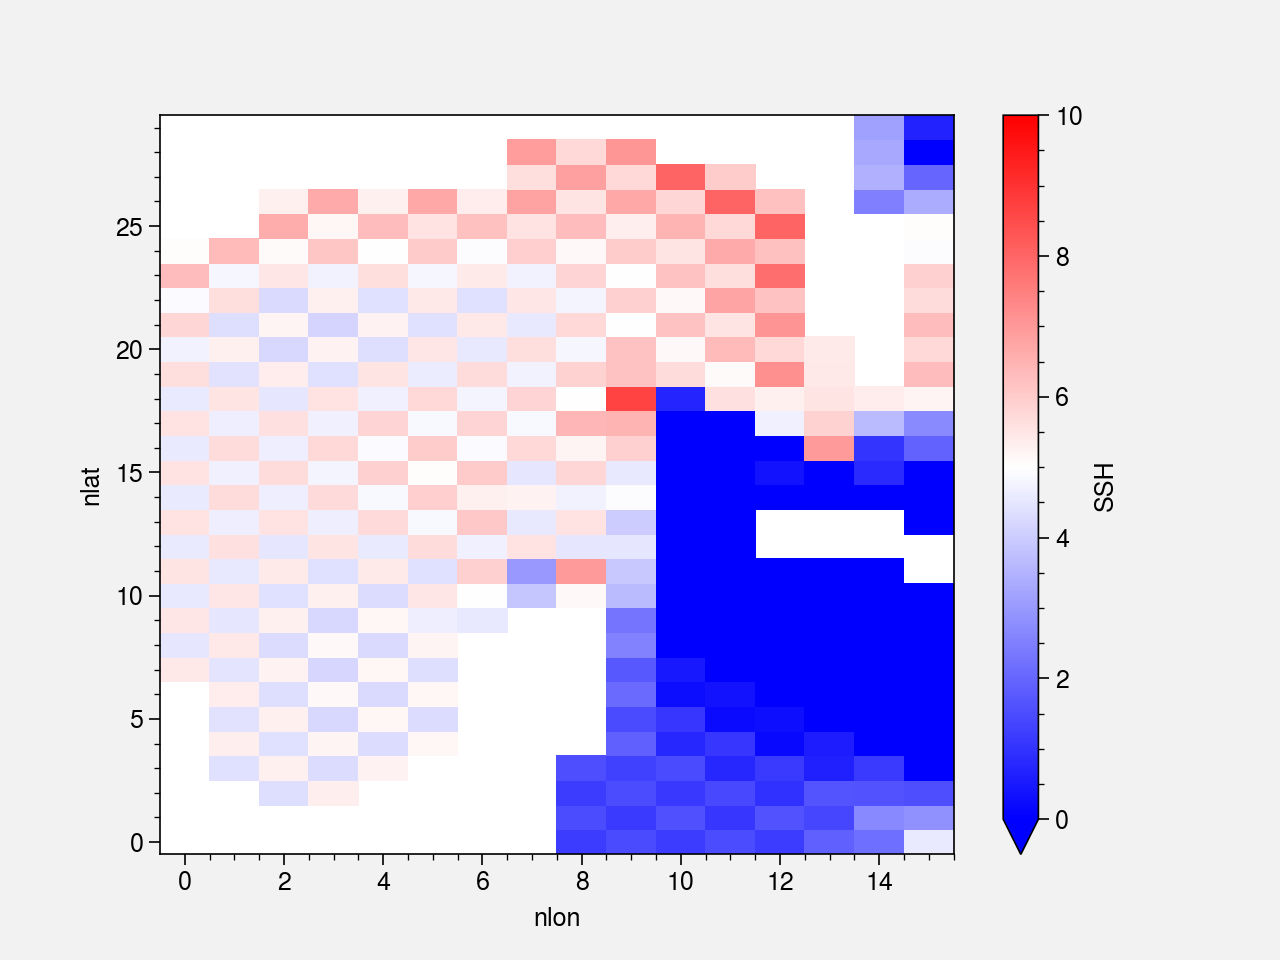

In [40]:
# dssh_NA_TL.isel(nlon=slice(9,25),nlat=slice(50,80)).plot.pcolormesh(vmin=0,vmax=10,cmap='bwr')

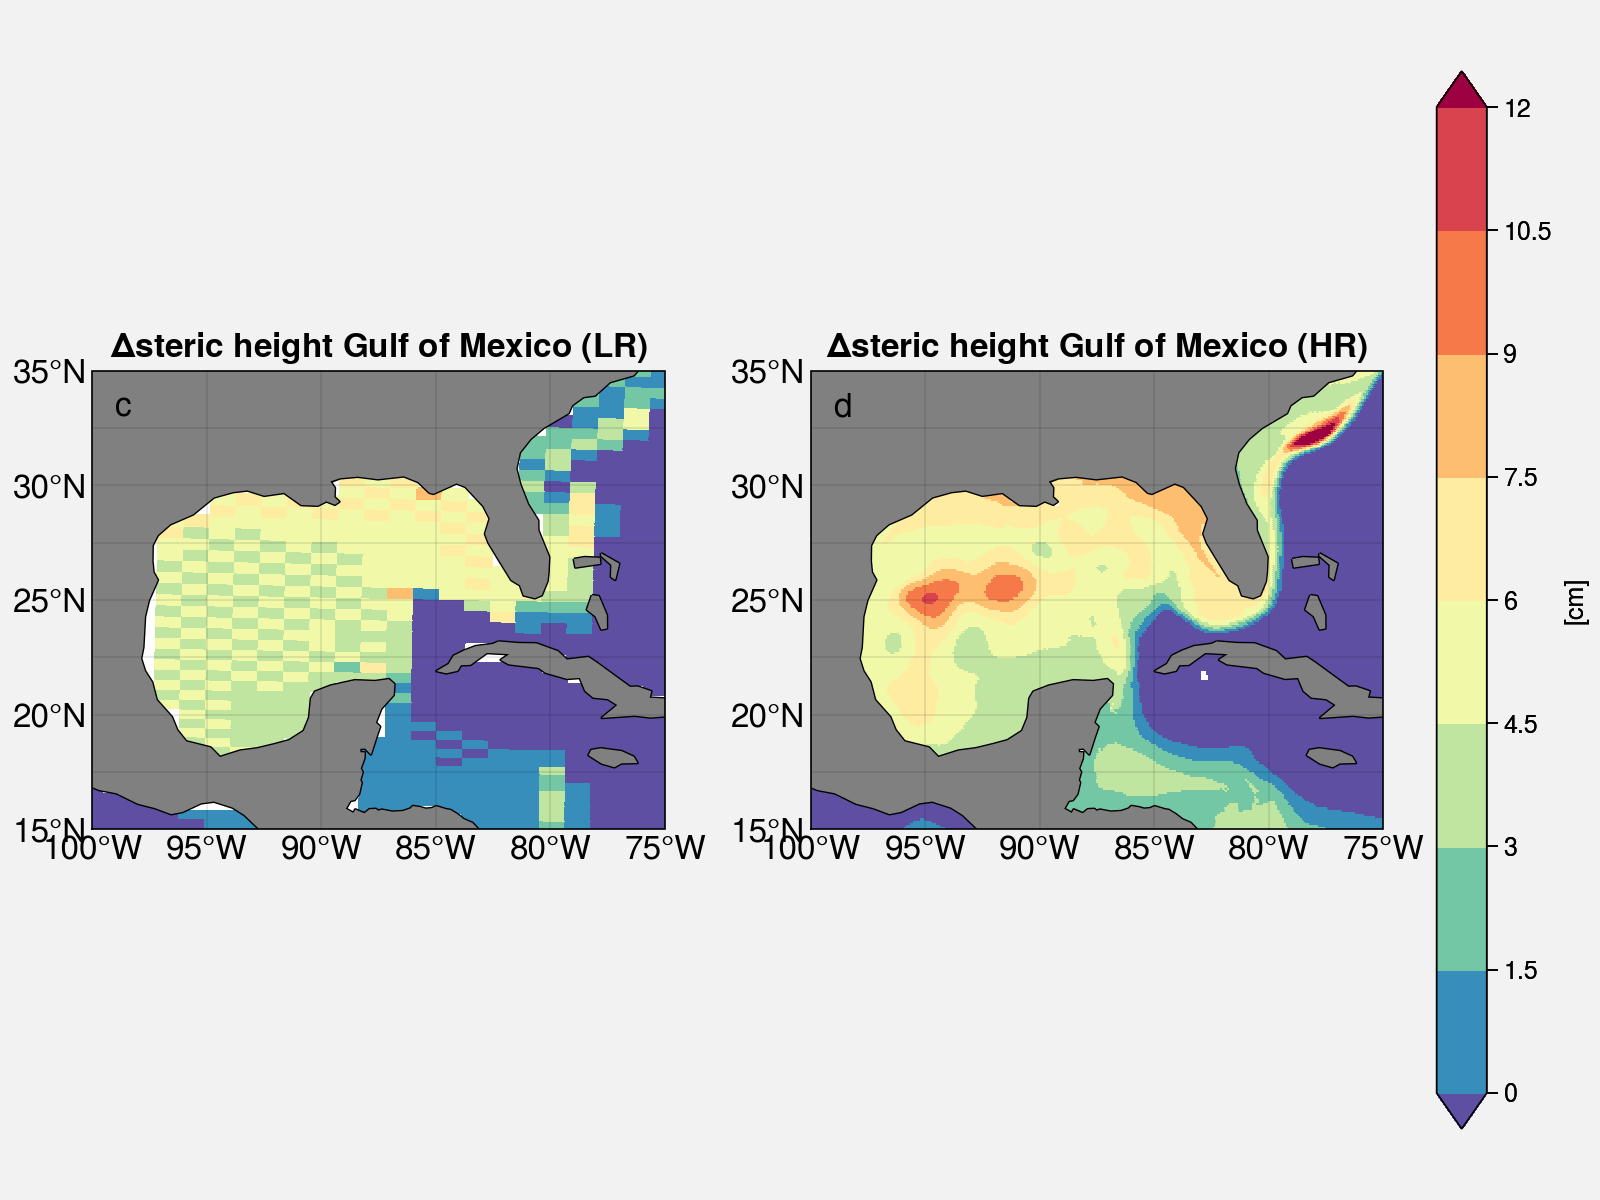

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super

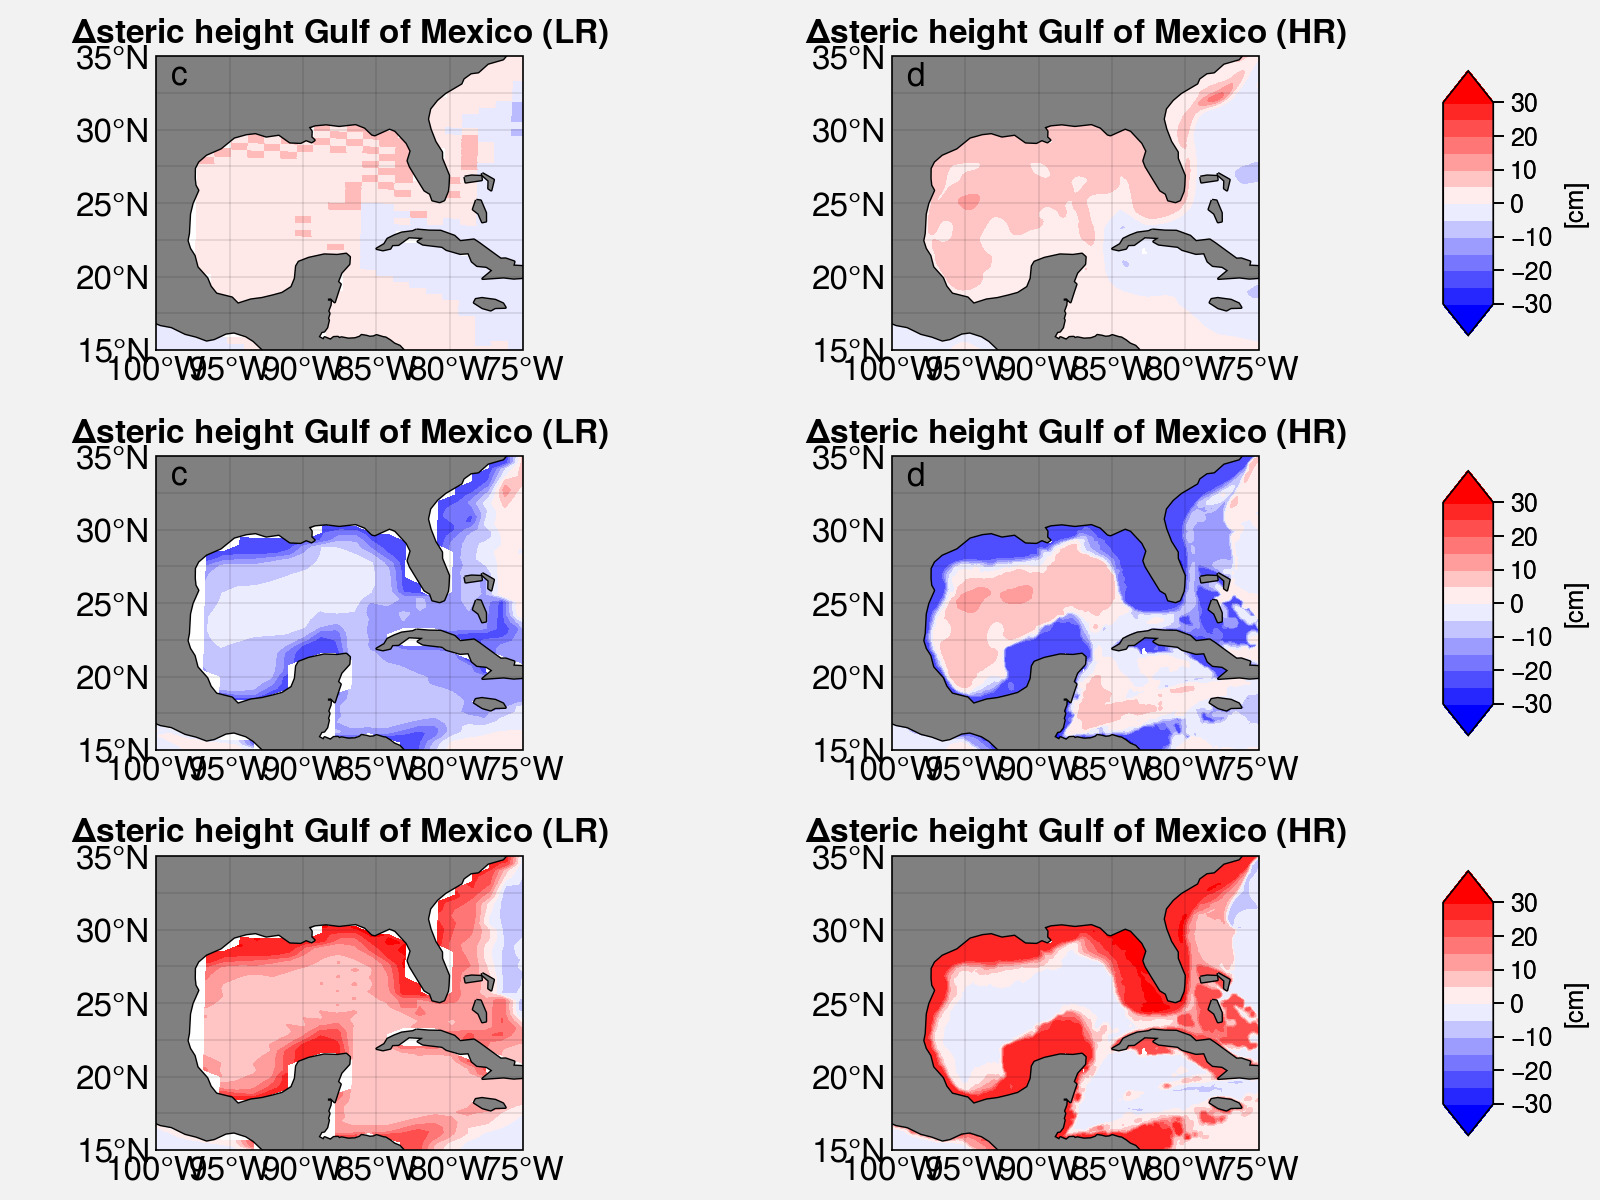

In [42]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='6in')

# m00=axs[0,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         dssh_NA_TLmCL, levels=np.arange(-30,30+1,5), 
#         transform=pc, cmap="bwr", extend='both')
m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dssh_NA_TL,vmin=-30,vmax=30, 
        transform=pc, cmap="bwr", extend='both')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[0,0].set_title(r'$\Delta$steric height Gulf of Mexico (LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-99, 33, 'c', transform=pc, fontsize=12)


m01=axs[0,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dssh_NA_THmCH, levels=np.arange(-30,30+1,5), 
        transform=pc, cmap="bwr", extend='both')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title(r'$\Delta$steric height Gulf of Mexico (HR)', fontsize=12, fontweight='bold')
axs[0,1].text(-99, 33, 'd', transform=pc, fontsize=12)
# ap=axs[0,1].add_patch(mpatches.Rectangle(xy=[lon1b_GMe, lat1b_GMe], 
#                                          width=(lon2b_GMe-lon1b_GMe), height=(lat2b_GMe-lat1b_GMe),
#                                          facecolor='none',transform=pc,
#                                          linewidth=2, edgecolor='r'))
# ap.set_zorder(2)
# add colorbar
cb = axs[0,1].colorbar(m01,loc='r', label='[cm]',width='2em',shrink=0.9)

m10=axs[1,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dh_rst_NA_TLmCL, levels=np.arange(-30,30+1,5), 
        transform=pc, cmap="bwr", extend='both')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[1,0].set_title(r'$\Delta$steric height Gulf of Mexico (LR)', fontsize=12, fontweight='bold')
axs[1,0].text(-99, 33, 'c', transform=pc, fontsize=12)


m11=axs[1,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dh_rst_NA_THmCH, levels=np.arange(-30,30+1,5), 
        transform=pc, cmap="bwr", extend='both')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title(r'$\Delta$steric height Gulf of Mexico (HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-99, 33, 'd', transform=pc, fontsize=12)
# ap=axs[1,1].add_patch(mpatches.Rectangle(xy=[lon1b_GMe, lat1b_GMe], 
#                                          width=(lon2b_GMe-lon1b_GMe), height=(lat2b_GMe-lat1b_GMe),
#                                          facecolor='none',transform=pc,
#                                          linewidth=2, edgecolor='r'))
# ap.set_zorder(2)
# add colorbar
cb = axs[1,1].colorbar(m11,loc='r', label='[cm]',width='2em',shrink=0.9)

m20=axs[2,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        (dssh_NA_TLmCL-dh_rst_NA_TLmCL), levels=np.arange(-30,30+1,5), 
        transform=pc, cmap="bwr", extend='both')
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('(LR)', fontsize=15, fontweight='bold')
axs[2,0].set_title(r'$\Delta$steric height Gulf of Mexico (LR)', fontsize=12, fontweight='bold')
# axs[2,0].text(-99, 33, 'c', transform=pc, fontsize=12)


m21=axs[2,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        (dssh_NA_THmCH-dh_rst_NA_THmCH), levels=np.arange(-30,30+1,5), 
        transform=pc, cmap="bwr", extend='both')
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_GMe, lon2_GMe, lat1_GMe, lat2_GMe], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_GMe,lon2_GMe+1,5), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_GMe,lon2_GMe+1,5), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_GMe,lat2_GMe+1, 5), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_GMe,lat2_GMe+1, 5), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title(r'$\Delta$steric height Gulf of Mexico (HR)', fontsize=12, fontweight='bold')
# axs[2,1].text(-99, 33, 'd', transform=pc, fontsize=12)
# ap=axs[2,1].add_patch(mpatches.Rectangle(xy=[lon1b_GMe, lat1b_GMe], 
#                                          width=(lon2b_GMe-lon1b_GMe), height=(lat2b_GMe-lat1b_GMe),
#                                          facecolor='none',transform=pc,
#                                          linewidth=2, edgecolor='r'))
# ap.set_zorder(2)
# add colorbar
cb = axs[2,1].colorbar(m21,loc='r', label='[cm]',width='2em',shrink=0.9)


# fig1.savefig(pic1,bbox_inches='tight')

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)
/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


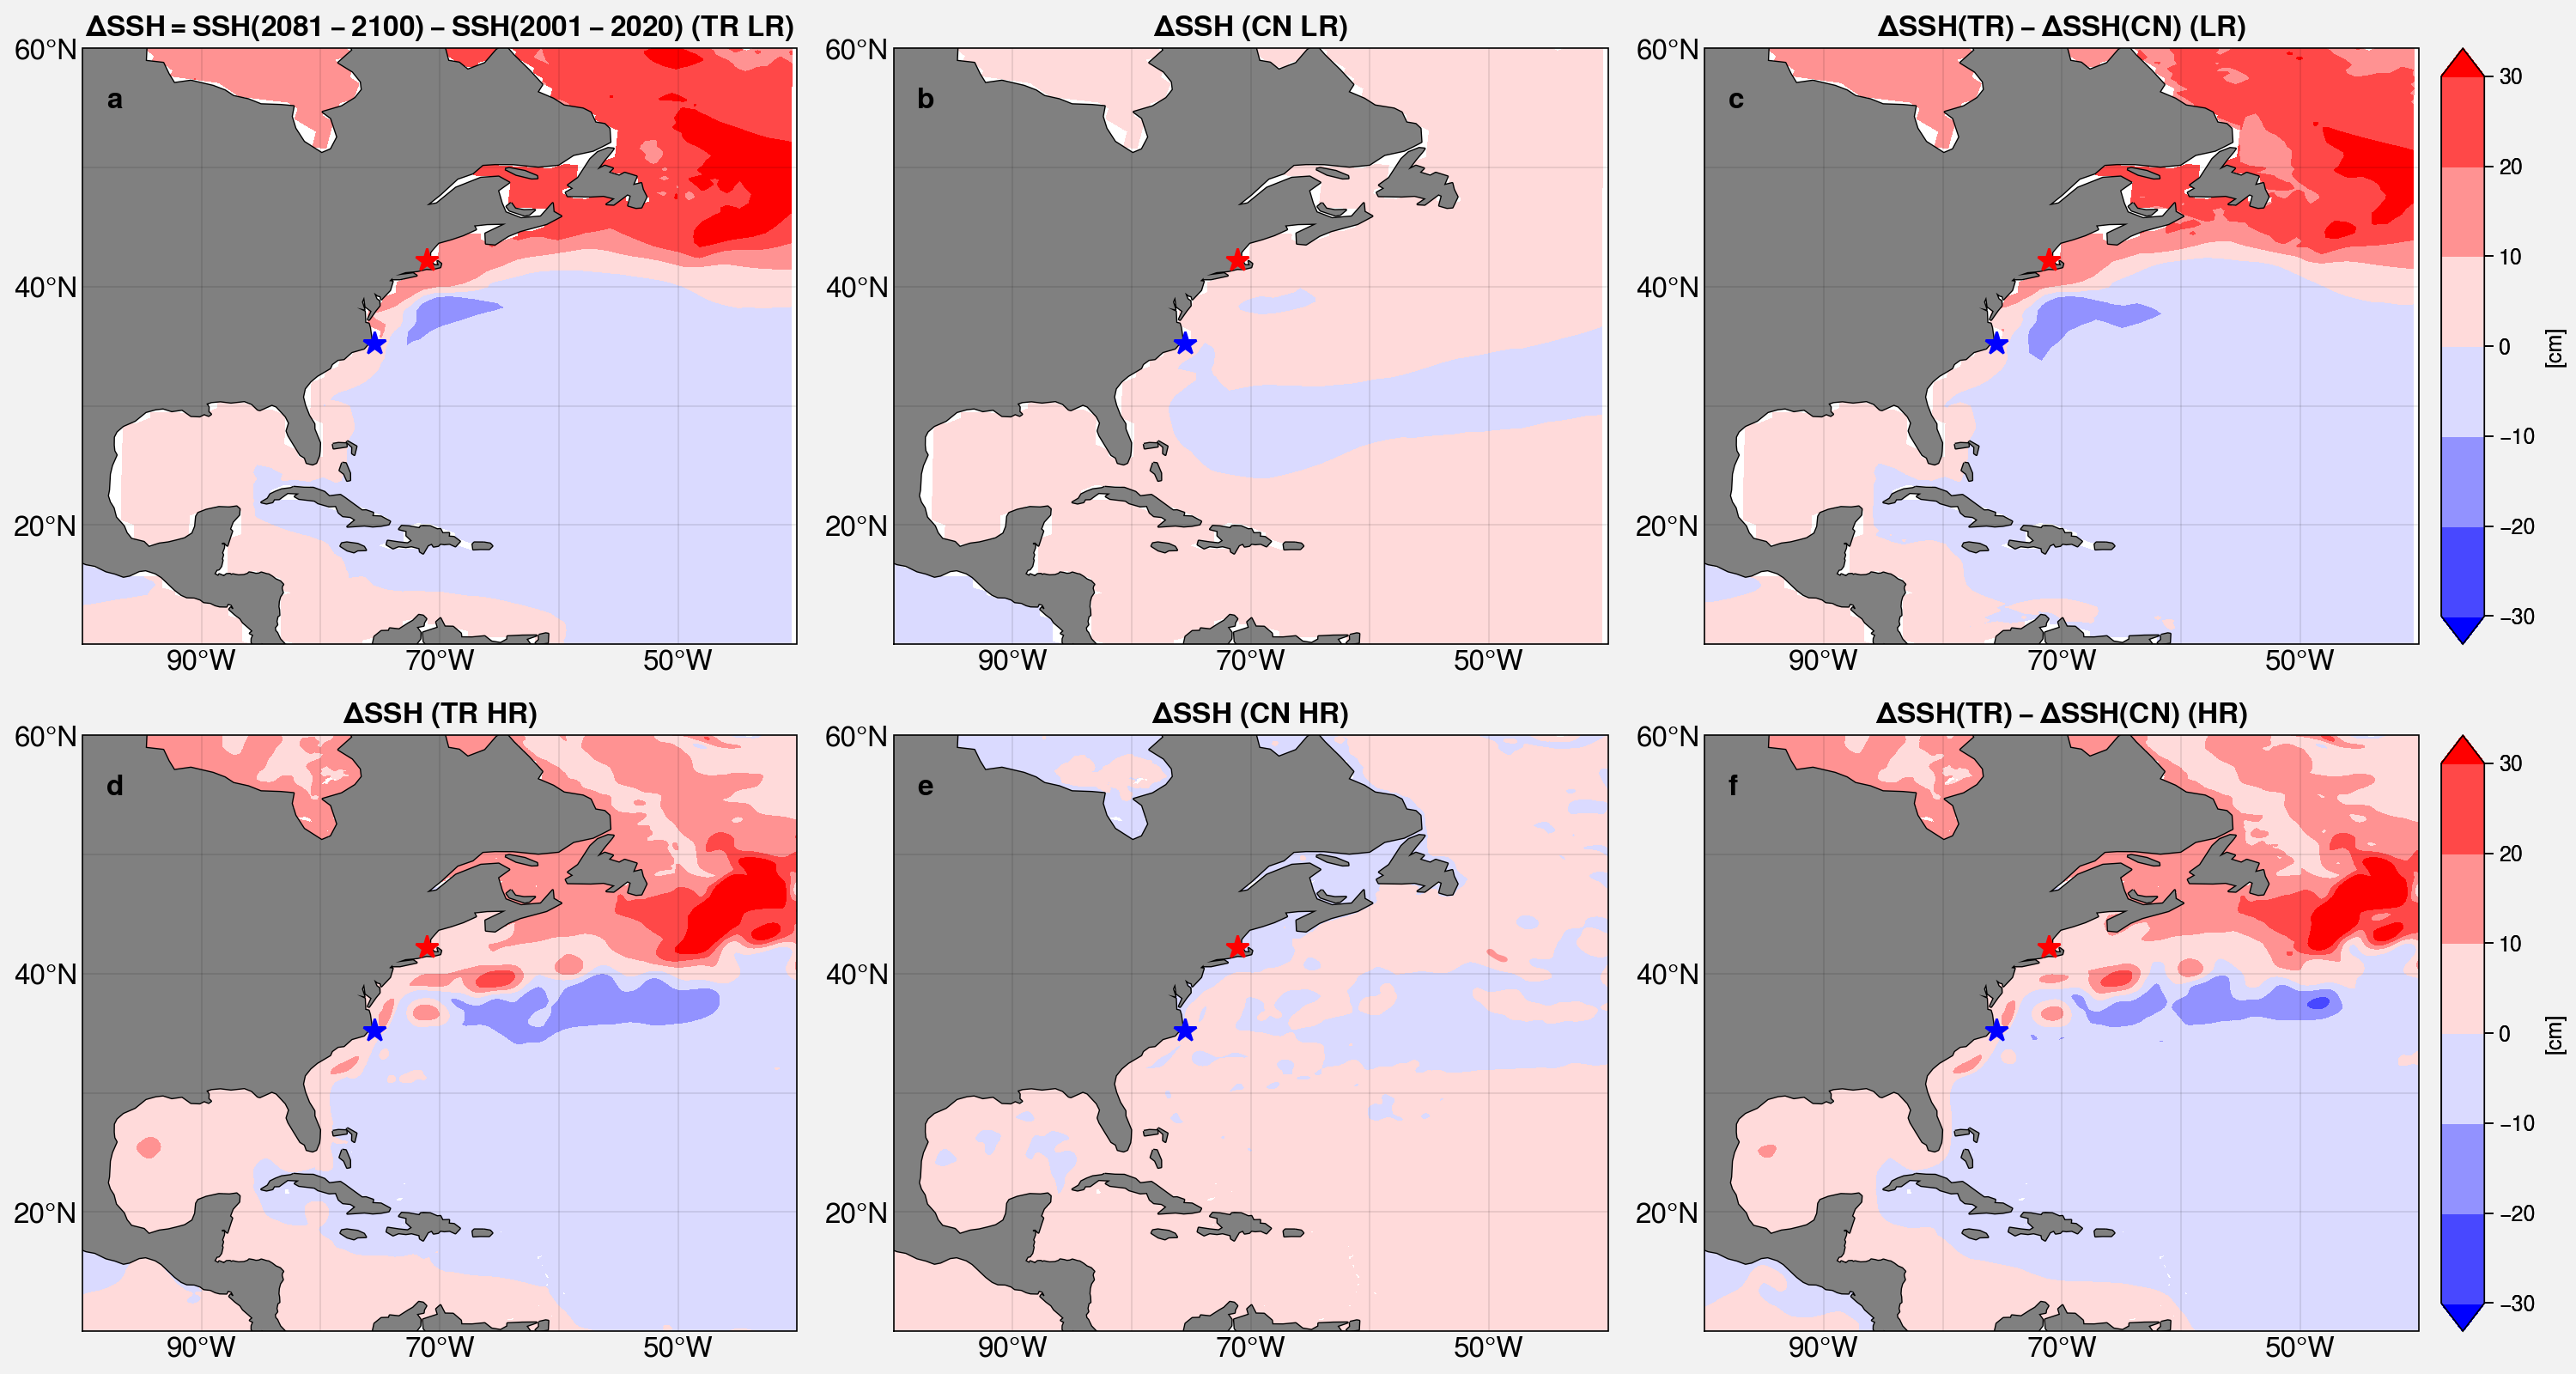

In [11]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=2,ncols=3,proj='cyl',width='15in',height='8in')
c_min=-30
c_max=30
c_step=10
cut=-0.

# row 1: LR
m00=axs[0,0].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dssh_NA_TL, levels=np.arange(c_min,c_max+1,c_step), transform=pc, 
        vmin=-25, vmax=25, cmap="bwr", cmap_kw={'cut': cut}, extend='both') # [-25,-20,-15,-10,0,10,15,20,25]
# m00=axs[0,0].pcolormesh(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
#         dssh_NA_TL, transform=pc, 
#         vmin=-25, vmax=25, cmap="bwr", cmap_kw={'cut': cut}, extend='both',shading='flat') # [-25,-20,-15,-10,0,10,15,20,25]

axs[0,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,0].set_xticks(np.arange(lon1+10,lon2+1,20), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1+10,lon2+1,20), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1+10,lat2+1, 20), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1+10,lat2+1, 20), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title(r'$\Delta SSH = SSH(2081-2100) - SSH(2001-2020)$ (TR LR)', fontsize=12, fontweight='bold')
axs[0,0].text(-98, 55, 'a', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)

m01=axs[0,1].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        dssh_NA_CL, levels=np.arange(c_min,c_max+1,c_step), transform=pc, 
        vmin=-25, vmax=25, cmap="bwr", cmap_kw={'cut': cut}, extend='both')
axs[0,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,1].set_xticks(np.arange(lon1+10,lon2+1,20), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1+10,lon2+1,20), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1+10,lat2+1, 20), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1+10,lat2+1, 20), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title(r'$\Delta SSH$ (CN LR)', fontsize=12, fontweight='bold')
axs[0,1].text(-98, 55, 'b', transform=pc, fontsize=12, fontweight='bold')
# cb = axs[0,0].colorbar(m00,loc='r',label='[cm]',extend='both',width='2em',shrink=1)


m02=axs[0,2].contourf(ds_NA_g16.TLONG, ds_NA_g16.TLAT, 
        (dssh_NA_TL - dssh_NA_CL), levels=np.arange(c_min,c_max+1,c_step), transform=pc, 
        vmin=-25, vmax=25, cmap="bwr", cmap_kw={'cut': cut}, extend='both')
axs[0,2].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[0,2].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[0,2].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,2].format(land=True, landcolor='grey')
axs[0,2].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[0,2].set_xticks(np.arange(lon1+10,lon2+1,20), crs=pc)
axs[0,2].set_xticklabels(np.arange(lon1+10,lon2+1,20), fontsize=12)
axs[0,2].xaxis.set_major_formatter(lon_formatter)
axs[0,2].set_yticks(np.arange(lat1+10,lat2+1, 20), crs=pc)
axs[0,2].set_yticklabels(np.arange(lat1+10,lat2+1, 20), fontsize=12)
axs[0,2].yaxis.set_major_formatter(lat_formatter)
axs[0,2].set_title(r'$\Delta SSH (TR) - \Delta SSH (CN)$ (LR)', fontsize=12, fontweight='bold')
axs[0,2].text(-98, 55, 'c', transform=pc, fontsize=12, fontweight='bold')
cb = axs[0,2].colorbar(m02,loc='r',label='[cm]',width='2em',shrink=1)


# row 1: LR
m10=axs[1,0].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dssh_NA_TH, levels=np.arange(c_min,c_max+1,c_step), transform=pc, 
        vmin=-25, vmax=25, cmap="bwr", cmap_kw={'cut': cut}, extend='both')
axs[1,0].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,0].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,0].set_xticks(np.arange(lon1+10,lon2+1,20), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1+10,lon2+1,20), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1+10,lat2+1, 20), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1+10,lat2+1, 20), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title(r'$\Delta SSH$ (TR HR)', fontsize=12, fontweight='bold')
axs[1,0].text(-98, 55, 'd', transform=pc, fontsize=12, fontweight='bold')

m11=axs[1,1].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        dssh_NA_CH, levels=np.arange(c_min,c_max+1,c_step), transform=pc, 
        vmin=-25, vmax=25, cmap="bwr", cmap_kw={'cut': cut}, extend='both')
axs[1,1].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,1].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,1].set_xticks(np.arange(lon1+10,lon2+1,20), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1+10,lon2+1,20), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1+10,lat2+1, 20), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1+10,lat2+1, 20), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title(r'$\Delta SSH$ (CN HR)', fontsize=12, fontweight='bold')
axs[1,1].text(-98, 55, 'e', transform=pc, fontsize=12, fontweight='bold')


m12=axs[1,2].contourf(ds_NA_t12.TLONG, ds_NA_t12.TLAT, 
        (dssh_NA_TH - dssh_NA_CH), levels=np.arange(c_min,c_max+1,c_step), transform=pc, 
        vmin=-25, vmax=25, cmap="bwr", cmap_kw={'cut': cut}, extend='both')
axs[1,2].plot(-71.1,42.2,transform=pc,marker='*',color='r',markersize=10)
# Boston (71.1W, 42.4N)
axs[1,2].plot(-75.5,35.2,transform=pc,marker='*',color='b',markersize=10)
# Cape Hatters (75.5W, 35.2N)
axs[1,2].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,2].format(land=True, landcolor='grey')
axs[1,2].set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs[1,2].set_xticks(np.arange(lon1+10,lon2+1,20), crs=pc)
axs[1,2].set_xticklabels(np.arange(lon1+10,lon2+1,20), fontsize=12)
axs[1,2].xaxis.set_major_formatter(lon_formatter)
axs[1,2].set_yticks(np.arange(lat1+10,lat2+1, 20), crs=pc)
axs[1,2].set_yticklabels(np.arange(lat1+10,lat2+1, 20), fontsize=12)
axs[1,2].yaxis.set_major_formatter(lat_formatter)
axs[1,2].set_title(r'$\Delta SSH (TR) - \Delta SSH (CN)$ (HR)', fontsize=12, fontweight='bold')
axs[1,2].text(-98, 55, 'f', transform=pc, fontsize=12, fontweight='bold')
cb = axs[1,2].colorbar(m12,loc='r',label='[cm]',width='2em',shrink=1)

fig1.savefig(pic1, bbox_inches='tight')

# Appendix

In [ ]:
dssh_TLmCL = (dssh_TL-dssh_CL).compute()
dssh_THmCH = (dssh_TH-dssh_CH).compute()

dssh_rgd_THmCH = regridder_t12_g16deg(dssh_THmCH) 
dssh_HRmLR = (dssh_rgd_THmCH - dssh_TLmCL)#.drop(['lon','lat'])
# print(dh_rst_HRmLR) 

# dph_rst_HRmLR = dh_rst_HRmLR/dh_rst_TLmCL
dssh_NA_HRmLR = dssh_HRmLR.isel(nlon=slice(nlon1_g16, nlon2_g16),nlat=slice(nlat1_g16, nlat2_g16))

ds_g16_rn = ds_g16.rename({'TLONG': 'lon', 'TLAT': 'lat'}) # rn: rename
ds_t12_rn = ds_t12.rename({'TLONG': 'lon', 'TLAT': 'lat'})
weightfile_t12_g16deg = ('/scratch/user/dapengli/Projects4iHESP/'
                       'Project_SeaLevelUSEastCoast_2021Mar30/python_scripts/'
                      'bilinear_POPt12_g16_Global_periodic_2021Apr12.nc')
regridder_t12_g16deg = xe.Regridder(ds_t12_rn, ds_g16_rn, method='bilinear', 
                                    periodic=True, filename=weightfile_t12_g16deg, 
                                    reuse_weights=True) # 